In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas_datareader as pdr

import datetime

In [73]:
prices = pdr.get_data_yahoo(['CVX','XOM', 'BP', 'SOIL', 'OGZPY'],
                            start = datetime.datetime(2019, 1, 1),
                            end = datetime.datetime(2020,4,19)
                           )['Adj Close']
# CVX: Chevron
# XOM: Exxon mobil
# BP: British oil company
# Soil: Soil
# OGZPY: Gazprom(Russia)

prices.head()

Symbols,CVX,XOM,BP,SOIL,OGZPY
Date,,,,,
2018-12-31,103.334755,64.152336,35.056370,8.769525,4.122921
2019-01-02,105.139481,65.563515,35.675777,8.759637,4.197544
2019-01-03,103.125793,64.556870,35.879162,8.640997,4.253511
2019-01-04,105.262962,66.937065,37.007030,8.987033,4.346789
2019-01-07,106.630760,67.285156,37.127216,9.095786,4.402757


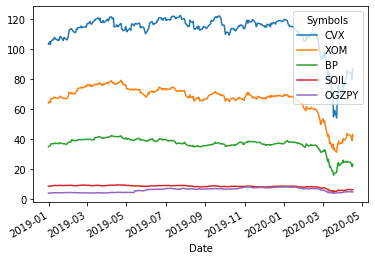

In [74]:
prices.plot()

In [75]:
print("CVX min: ", prices['CVX'].min())
print("XOM min: ", prices['XOM'].min())
print("BP min: ", prices['BP'].min())
print("SOIL min: ", prices['SOIL'].min())
print("OGZPY min: ", prices['OGZPY'].min())

CVX min:  54.220001220703125
XOM min:  31.450000762939453
BP min:  16.110000610351562
SOIL min:  5.300000190734863
OGZPY min:  4.019999980926514


In [76]:
for name in prices.columns:
    prices[name] = prices[name]-prices[name].min()

In [77]:
prices['SOIL'] = prices['SOIL'] * 10
prices['OGZPY'] = prices['OGZPY'] * 10

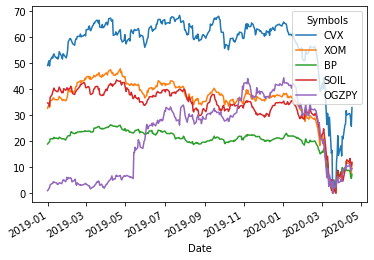

In [78]:
# match the lowest price as zero
prices.plot()

In [82]:
# import Crude Oil price
price_oil = pdr.get_data_yahoo(['CL=F'],
                               start = datetime.datetime(2019, 1, 1),
                            end = datetime.datetime(2020,4,19)
                              )['Adj Close']
price_oil.head()

Symbols,CL=F
Date,
2018-12-31,45.410000
2019-01-02,46.540001
2019-01-03,47.090000
2019-01-04,47.959999
2019-01-07,48.520000


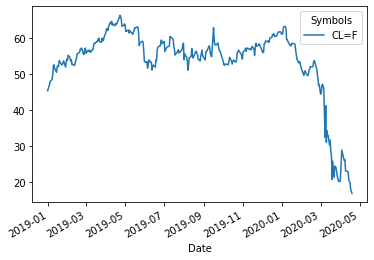

In [83]:
price_oil.plot()

In [87]:
#cominbe two dataframe
prices['OIL'] = price_oil['CL=F']
prices.dropna(inplace = True)

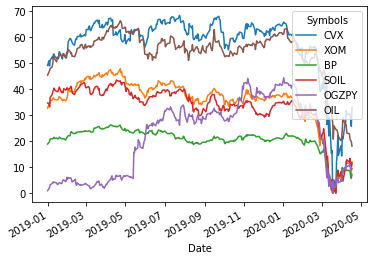

In [88]:
prices.plot()

In [97]:
prices[:]

Symbols,CVX,XOM,BP,SOIL,OGZPY,OIL
Date,,,,,,
2018-12-31,49.114754,32.702335,18.946369,34.695244,1.029205,45.410000
2019-01-02,50.919479,34.113514,19.565777,34.596367,1.775436,46.540001
2019-01-03,48.905792,33.106869,19.769161,33.409967,2.335110,47.090000
2019-01-04,51.042961,35.487064,20.897030,36.870327,3.267894,47.959999
2019-01-07,52.410759,35.835155,21.017216,37.957859,3.827567,48.520000
...,...,...,...,...,...,...
2020-04-13,30.690002,11.309998,8.799999,11.999998,10.599999,22.930000
2020-04-14,30.389999,10.980000,8.330000,13.399997,11.300001,20.860001
2020-04-15,28.269997,9.029999,6.730000,10.899997,8.899999,20.260000


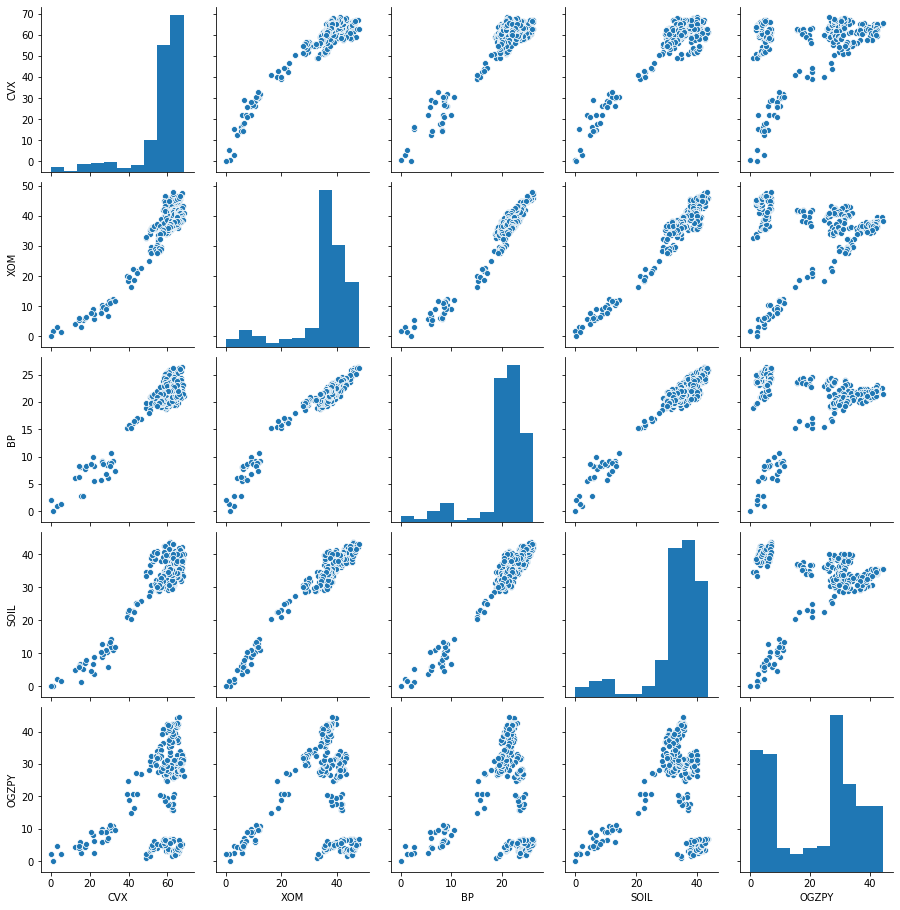

In [108]:
cols = ['CVX','XOM', 'BP', 'SOIL', 'OGZPY']
sns.pairplot(prices[cols])
plt.show()

# DROP OGZPY

In [110]:
prices.drop('OGZPY', axis =1 , inplace = True)

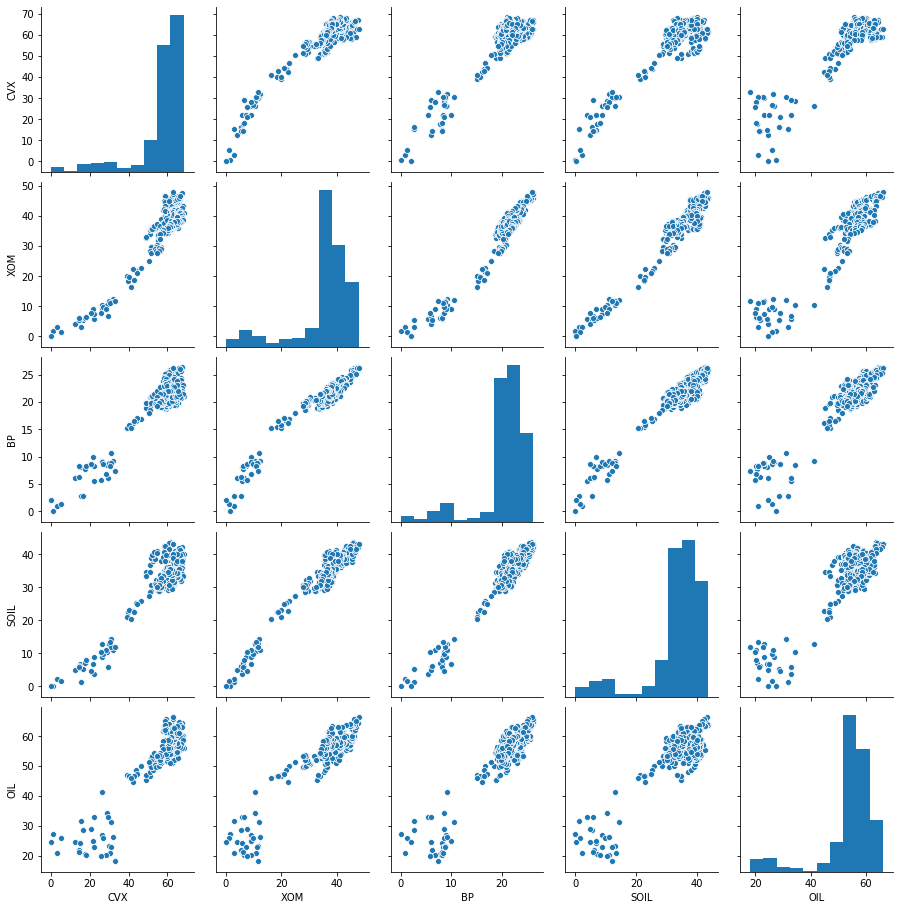

In [113]:
cols = ['CVX','XOM', 'BP', 'SOIL', 'OIL']
sns.pairplot(prices[cols])
plt.show()